In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline
# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt
# Import pandas under the abbreviation 'pd'
import pandas as pd
# Import NumPy under the abbreviation 'np'
import numpy as np
# Libraries to aid in web scraping
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import seaborn as sns;
#Notes for efficienccy:
#shift + tab when cursor is in arguments to bring up its documentation
#ex: pd.DataFrame(Shift+tab here)
#recall: Json == Dictionary
#to know functions of pandas:
#dir(pd)

In [2]:
# Getting the Cleaned Datasets
acquisC = pd.read_csv("datasets/startupsCleaned/acquisitionsCleaned.csv")
companiesCS = pd.read_csv("datasets/startupsCleaned/companiesCleanedAndScraped.csv", parse_dates=['founded_at', 'first_funding_at', 'last_funding_at', 'time_before_first_fund'])
investsC = pd.read_csv("datasets/startupsCleaned/investmentsCleaned.csv")
roundsC = pd.read_csv("datasets/startupsCleaned/roundsCleaned.csv")
dfAllC = [acquisC, companiesCS, investsC, roundsC]
lstCsvNames = ["acquisitions", "companies", "investments", "rounds"]

## Question 1 (Aisha) : Can the number of technologies used by companies affect the rate of its success or failure?

Explanation and visualization:





 This can be seen by checking the funding each company received based on their status and technology count.First we extract these columns from the companies table.

In [3]:

miniTable=companiesCS.loc[:, ['status','number_of_technologies','funding_total_usd']]


Secondly we'll start analysing this data based on status.


1- Operating Companies

In [4]:
operating=miniTable.loc[miniTable['status']=="operating"]
operating.iloc[0:40,:]

,status,number_of_technologies,funding_total_usd
0,operating,1,10000000.0
1,operating,3,700000.0
2,operating,10,3406878.0
3,operating,5,2000000.0
4,operating,10,0.0
5,operating,6,41250.0
6,operating,6,762851.0
7,operating,32,33600000.0
8,operating,3,1150050.0
9,operating,5,40000.0


From the table above we can notice that on the first row the funding is a large amount and the company only uses one technology.
The second row has only 3 technologies but the difference seems quite noticeable.
In the third row how ever,we have 10 technologies being used and a quite large amount of funding. Though not as large as in row one. We can deduce that with technologies there a need for funding technological maintainance too unlike the first row which will need much less of that and hence has all funds going to other busines needs. This can be confirmed with the graphs below.

Text(0.5, 1.0, 'Operating companies and their technologies')

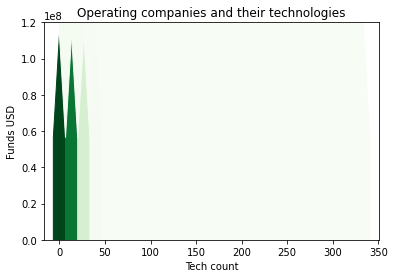

In [52]:
plt.hexbin(operating.number_of_technologies,operating.funding_total_usd,gridsize = 25, cmap ='Greens')
plt.xlabel('Tech count')
plt.ylabel('Funds USD')
plt.ylim([0,1.2e8])
plt.title("Operating companies and their technologies")

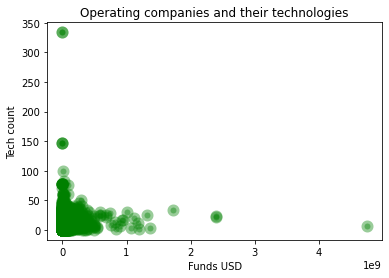

In [6]:
plt.scatter(operating.funding_total_usd,operating.number_of_technologies,c="green", alpha=0.4, linewidth=6)
plt.title("Operating companies and their technologies")
plt.ylabel('Tech count')
plt.xlabel('Funds USD') 
plt.show()

As shown above, most operating companies have funds in the range approximately [0,0.5]e9 USD with technology count ranging from 0 to approximately 90. Few have technologies above 90 and funding above 1e9 USD just like we were able to deduce from the table.

2- Acquired companies

In [7]:
acquired=miniTable.loc[miniTable['status']=="acquired"]
acquired.iloc[0:40,:]


,status,number_of_technologies,funding_total_usd
13,acquired,4,5.000000e+06
17,acquired,4,5.000000e+05
20,acquired,3,2.535000e+06
28,acquired,19,1.250000e+06
29,acquired,21,3.500000e+07
51,acquired,8,0.000000e+00
56,acquired,6,0.000000e+00
58,acquired,5,7.000000e+05
69,acquired,2,1.400000e+07
80,acquired,13,0.000000e+00


The same logic seem to hold just like the operating companies and we can conclude that companies having high technology count with not very high amounts of funding possess technologies which require high maintainance.  This can be illustrated as follows.

Text(0.5, 1.0, 'Acquired companies and their technologies')

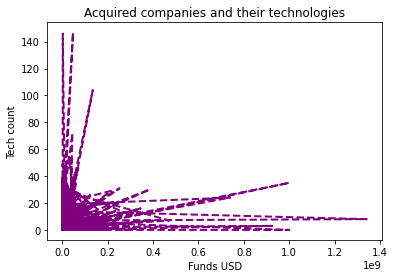

In [8]:

plt.plot( 'funding_total_usd','number_of_technologies', data=acquired,  marker='', color='purple', linewidth=2, linestyle='dashed')
plt.ylabel('Tech count')
plt.xlabel('Funds USD') 
plt.title("Acquired companies and their technologies")

The deduction of the same understanding repeating itself for acquired companies has now been confirmed with the graph above. We can view that most acquired companies have [0-40] technologies and [0-0.3]e9 USD of funding most of the time. Just to make sure that this logic is indeed the right one we will repeat the process for ipo companies.

3- IPO companies

In [9]:
ipo=miniTable.loc[miniTable['status']=="ipo"]
ipo.iloc[0:40,:]

,status,number_of_technologies,funding_total_usd
119,ipo,9,3.960000e+08
120,ipo,10,1.503475e+07
172,ipo,15,9.587500e+07
232,ipo,29,1.695000e+08
377,ipo,7,8.767800e+08
383,ipo,8,6.100000e+06
404,ipo,11,1.105250e+07
468,ipo,27,1.260000e+08
551,ipo,24,1.180000e+08
552,ipo,7,5.028600e+08


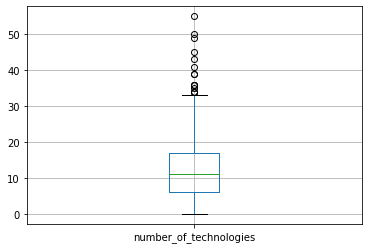

In [45]:
boxplot = ipo.boxplot(column=['number_of_technologies'])

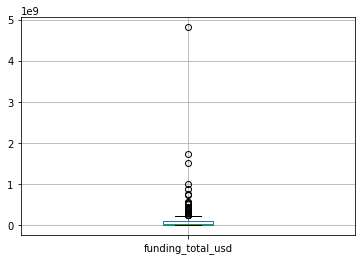

In [36]:
boxplot = ipo.boxplot(column=['funding_total_usd'])

Text(0.5, 1.0, 'IPO companies and their technologies')

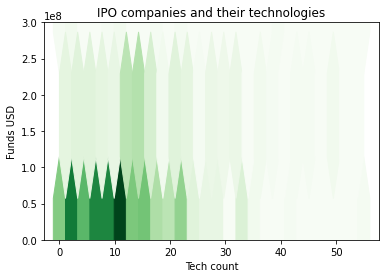

In [43]:
plt.hexbin(ipo.number_of_technologies,ipo.funding_total_usd,gridsize = 25, cmap ='Greens')
plt.xlabel('Tech count')
plt.ylabel('Funds USD') 
plt.ylim([0,3e8])
plt.title("IPO companies and their technologies")

We can now conclude that;
* Companies with high funding and little or no technology count are more focused on products and other business services.
* Companies with high funding and high technological count imply that these technologies require high maintainance which the shareholders are willing to provide.
*  Companies with low funding and high  technological count imply that these technologies don't require high maintainance.

 We can also conclude that some companies get acquired due to low funding and high technological demands whose maintainace the shareholders are not willing to pay extra money for.